In [56]:
cd Dataweav_Assignment

[Errno 2] No such file or directory: 'Dataweav_Assignment'
/home/sanyam/Documents/Dataweav_Assignment


# Extracting Database for page 4

In [68]:
location='Problem1/page-4.jpg'
out_directory='Problem1/page-4'

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import re
import pandas as pd


In [38]:
from PIL import Image
import sys

import pyocr
import pyocr.builders

tools = pyocr.get_available_tools()
if len(tools) == 0:
    print("No Tool Ocr found")

    sys.exit(1)
# The tools are returned in the recommended order of usage
tool = tools[0]
print("Will use tool '%s'" % (tool.get_name()))
# Ex: Will use tool 'libtesseract'

langs = tool.get_available_languages()
print("Available languages: %s" % ", ".join(langs))
lang = langs[0]
print("Will use lang '%s'" % (lang))
# Ex: Will use lang 'fra'
# Note that languages are NOT sorted in any way. Please refer
# to the system locale settings for the default language
# to use.

Will use tool 'Tesseract (sh)'
Available languages: eng, equ, osd
Will use lang 'eng'


In [71]:
import os
if os.path.isdir(out_directory):
    os.rmdir(out_directory)
os.mkdir(out_directory)

In [76]:
def crop_out(location,width,height,output):
    location=location
    w=width
    h=height
    k=1
    for i in range(10):
        for j in range(3):
            img=cv2.imread(location)
            crp=img[h:h+63,w:w+982]
            cv2.imwrite(output+'/box_'+str(i)+'_'+str(j)+'.jpg',crp)
            plt.figure(figsize=(25,25))
            plt.subplot(10,3,k)
            plt.imshow(crp)
            plt.show()
            w+=982
            k+=1
        w=width
        h+=63+340

def Extract_text(file_name):
    ls=[]
    for name in os.listdir(file_name):
        txt=tool.image_to_string(
            Image.open(file_name+'/'+name),
            lang=lang,
            builder=pyocr.builders.TextBuilder()
        )
        ls.append(txt)
    return ls

def splitter(string):
    temp=re.findall('\w',string)


    ident=''
    voterid=''
    if len(temp)!=0:
        if len(temp)==13:
            for i in range(3):
                ident=ident+temp[i]
         
            for i in range(3,len(temp)):
    
                voterid=voterid+temp[i]
        else:
            for i in range(2):
                ident=ident+temp[i]
            for i in range(2,len(temp)):
                voterid=voterid+temp[i]
    return (ident,voterid)

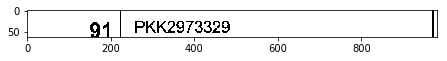

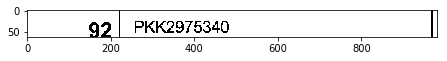

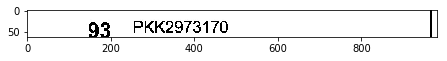

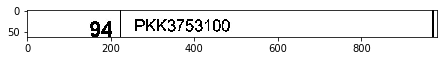

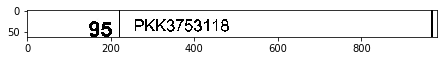

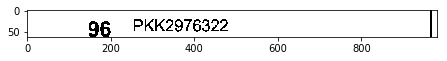

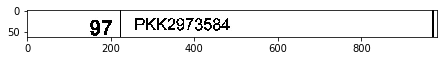

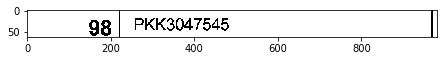

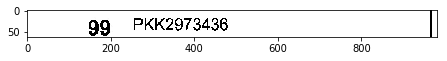

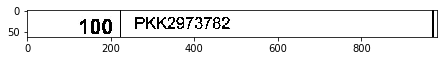

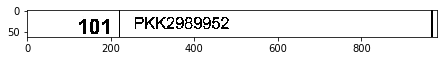

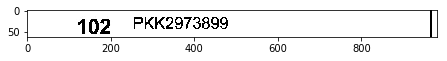

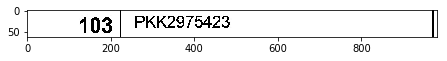

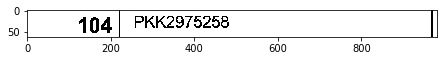

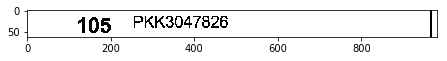

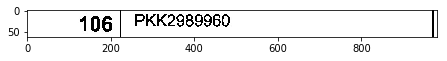

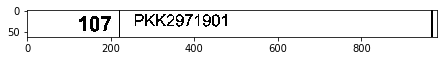

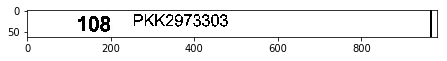

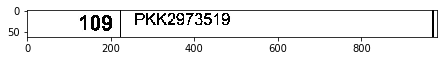

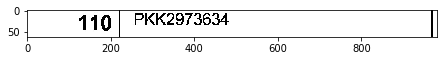

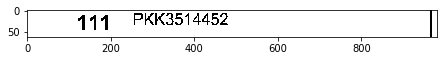

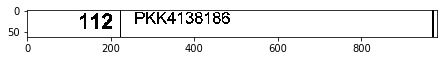

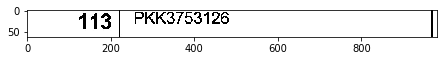

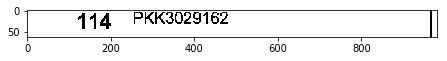

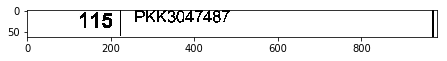

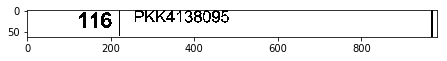

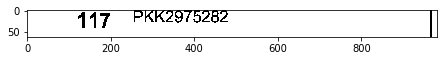

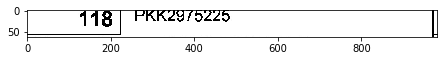

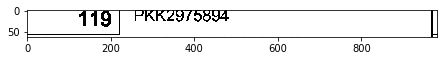

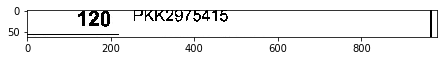

In [74]:
crop_out(location,190,290,out_directory)

In [77]:
ls=Extract_text(out_directory)
ls

['94 \\ PKK3753100',
 '101 \\ PKK2989952',
 '98 \\ PKK3047545',
 '1 17 PKK2975282',
 '113 ‘ PKK3753126',
 '1 16 PKK4138095',
 '1 15 PKK3047487',
 '96 \\ PKK2976322',
 '92 PKK2975340',
 '109‘ PKK2973519',
 '106 ‘ PKK2989960',
 '91 PKK2973329',
 '97 \\ PKK2973584',
 '102 \\ PKK2973899',
 '103 ‘ PKK2975423',
 '112 ‘ PKK4138186',
 '93 PKK2973170',
 '100 ‘ PKK2973782',
 '107 ‘ PKK2971901',
 '1 19 PKK2975894',
 '1 18 PKK2975225',
 '120 PKK2975415',
 '114 ‘ PKK3029162',
 '95 \\ PKK3753118',
 '111 ‘ PKK3514452',
 '11o ‘ PKK2973634',
 '105 ‘ PKK3047826',
 '108 ‘ PKK2973303',
 '99 \\ PKK2973436',
 '104 ‘ PKK2975258']

In [78]:
ls=[i for i in ls if len(i)!=0]
combined=list(map(splitter,ls))
identity,voterid=zip(*combined)

In [79]:
database=pd.DataFrame({'identity':identity,'voter_id':voterid})

In [80]:
database

,identity,voter_id
0,94,PKK3753100
1,101,PKK2989952
2,98,PKK3047545
3,117,PKK2975282
4,113,PKK3753126
5,116,PKK4138095
6,115,PKK3047487
7,96,PKK2976322
8,92,PKK2975340
9,109,PKK2973519


# EXTRACTING DATABASE FOR PAGE 13


In [88]:
location='Problem1/page-13.jpg'
out_directory='Problem1/page-13'

In [89]:

os.mkdir('Problem1/page-13')

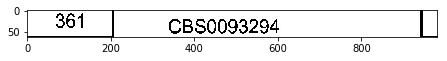

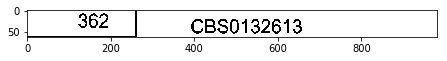

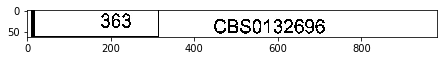

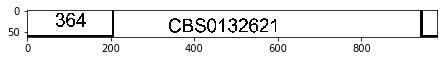

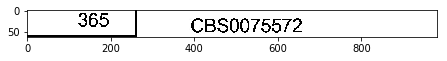

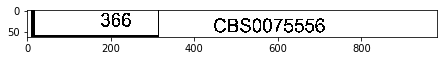

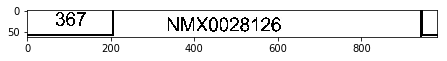

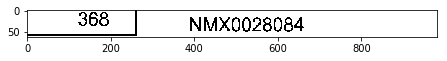

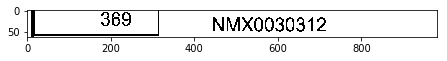

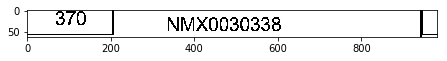

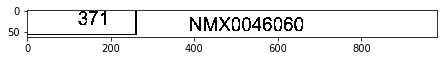

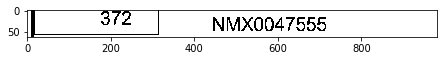

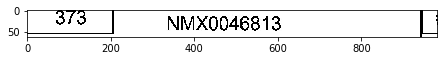

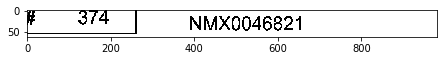

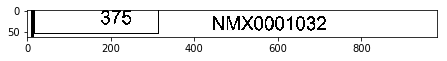

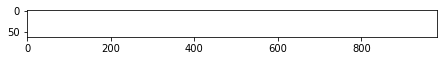

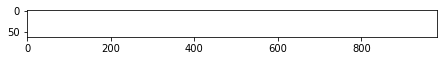

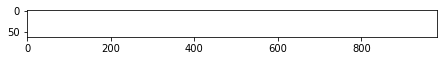

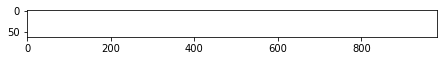

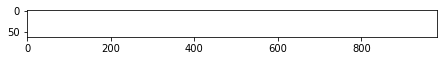

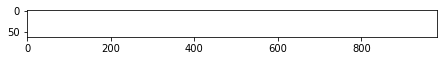

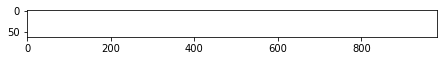

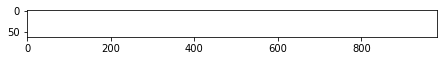

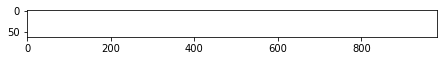

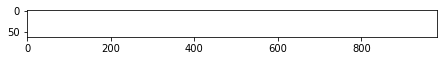

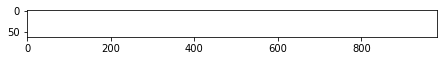

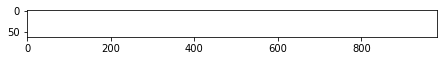

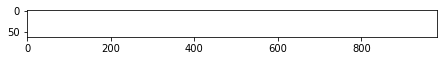

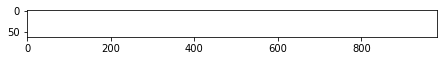

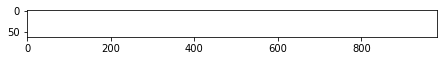

In [90]:
crop_out(location,190,290,out_directory)

In [91]:
ls=Extract_text(out_directory)
ls

['364 CBSO132621',
 '371 NMX0046060',
 '368 NMX0028084',
 '',
 '',
 '',
 '',
 '366 CBSOO75556',
 '362 CBSO132613',
 '',
 '',
 '361 CB80093294',
 '367 NMX0028126',
 '372 NMX0047555',
 '373\n\nN MX0046813',
 '',
 '363 CBSO132696',
 '370 NMX0030338',
 '',
 '',
 '',
 '',
 '',
 '365 CBSOO75572',
 '',
 '',
 '375 NMX0001032',
 '',
 '369 NMX0030312',
 '# 374 | NMX0046821']

In [92]:
ls=[i for i in ls if len(i)!=0]
combined=list(map(splitter,ls))
identity,voterid=zip(*combined)

In [97]:
database=pd.DataFrame({'identity':identity,'voter_id':voterid})
database

,identity,voter_id
0,364,CBSO132621
1,371,NMX0046060
2,368,NMX0028084
3,366,CBSOO75556
4,362,CBSO132613
5,361,CB80093294
6,367,NMX0028126
7,372,NMX0047555
8,373,NMX0046813
9,363,CBSO132696


In [103]:
serial=str(365)
print(database[database["identity"]==serial]['voter_id'])

11    CBSOO75572
Name: voter_id, dtype: object
